In this notebook we reconstruct the Stabilizer decomposition of the state $|H>^{\otimes 6}$ of *Trading classical and quantum computational resources* (2016).

Here $|H> = |0> + (1/\sqrt 2-1)|1>$ is within local Cliffords of $|T> = |0> + e^{i\pi/4} |1>$.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys; sys.path.append('..')
import random, math, os
import pyzx as zx
from fractions import Fraction
import numpy as np
%config InlineBackend.figure_format = 'svg'

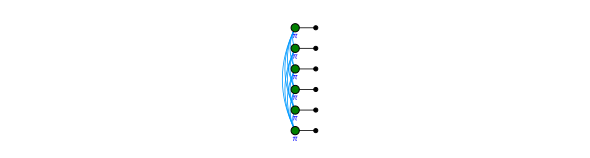

In [4]:
#Z^6 |K_6>
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(1,i, 0,Fraction(1))
    verts.append(v)
    g.add_edge((o,v))
g.scalar.add_power(15)
for i in range(6):
    for j in range(i+1,6):
        g.add_edge((verts[i],verts[j]),2)
display(zx.draw(g))
K6 = g.to_matrix(True)

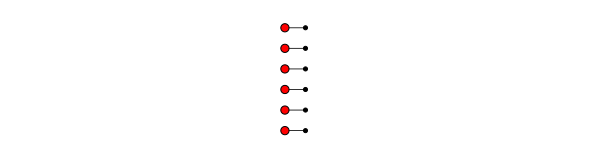

In [5]:
# |0>^6
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(2,i, 0)
    verts.append(v)
    g.add_edge((o,v))
g.scalar.add_power(-6)
display(zx.draw(g))
ket0 = g.to_matrix(True)

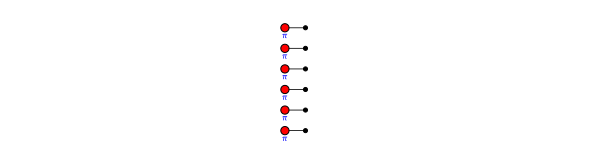

In [6]:
# |1>^6
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(2,i, 0, phase=Fraction(1))
    verts.append(v)
    g.add_edge((o,v))
g.scalar.add_power(-6)
display(zx.draw(g))
ket1 = g.to_matrix(True)

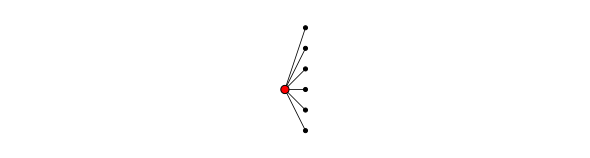

In [7]:
# |E_6>
g = zx.Graph()
v = g.add_vertex(2,3, 0)
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    g.add_edge((o,v))
g.scalar.add_power(4)
display(zx.draw(g))
E6 = g.to_matrix(True)

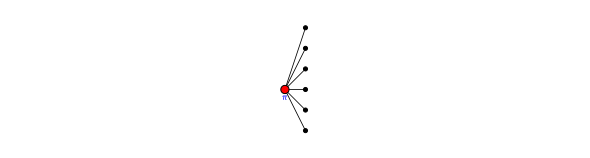

In [8]:
# |O_6>
g = zx.Graph()
v = g.add_vertex(2,3, 0, Fraction(1))
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    g.add_edge((o,v))
g.scalar.add_power(4)
display(zx.draw(g))
O6 = g.to_matrix(True)

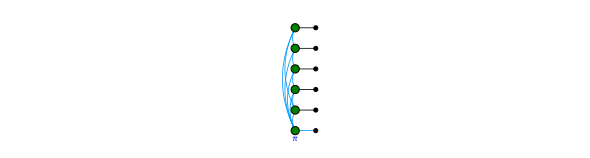

In [9]:
# |phi'>
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(1,i, 0)
    verts.append(v)
    if i == 5:
        g.add_edge((o,v),2)
    else: g.add_edge((o,v))
g.scalar.add_power(9)
for i in range(4):
    g.add_edge((verts[i],verts[i+1]),2)
    g.add_edge((verts[i],verts[5]),2)
g.add_edge((verts[0],verts[4]),2)
g.add_edge((verts[4],verts[5]),2)
g.set_phase(verts[5],Fraction(1))
display(zx.draw(g))
phi1 = g.to_matrix(True)

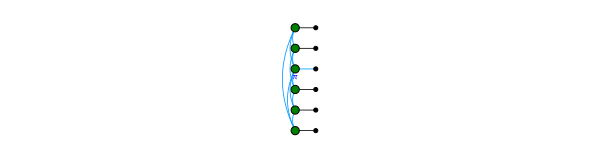

In [10]:
# |phi''>
g = zx.Graph()
verts = []
for i in range(6):
    o = g.add_vertex(0, i, 1)
    g.outputs.append(o)
    v = g.add_vertex(1,i, 0)
    verts.append(v)
    if i == 2:
        g.add_edge((o,v),2)
    else: g.add_edge((o,v))
g.scalar.add_power(9)
v1,v2,v3,v4,v5,v6 = verts
g.add_edges([(v1,v2),(v2,v4),(v4,v5),(v5,v6),(v1,v6),(v1,v3),(v2,v3),(v3,v4),(v3,v5),(v3,v6)],2)
g.set_phase(v3,Fraction(1))
display(zx.draw(g))
phi2 = g.to_matrix(True)

In [11]:
sq2 = math.sqrt(2)
H6 = (-16+12*sq2)*ket0 + (96 - 68*sq2)*ket1 + \
     (10-7*sq2)*E6 + (-14 + 10*sq2)*O6 + \
     (7-5*sq2)*K6 + (10-7*sq2)*phi1 + \
     (10-7*sq2)*phi2
H6

array([[1.        +0.j],
       [0.41421356-0.j],
       [0.41421356-0.j],
       [0.17157288-0.j],
       [0.41421356-0.j],
       [0.17157288+0.j],
       [0.17157288-0.j],
       [0.07106781+0.j],
       [0.41421356-0.j],
       [0.17157288+0.j],
       [0.17157288+0.j],
       [0.07106781+0.j],
       [0.17157288-0.j],
       [0.07106781+0.j],
       [0.07106781+0.j],
       [0.02943725+0.j],
       [0.41421356-0.j],
       [0.17157288+0.j],
       [0.17157288+0.j],
       [0.07106781+0.j],
       [0.17157288-0.j],
       [0.07106781+0.j],
       [0.07106781+0.j],
       [0.02943725+0.j],
       [0.17157288-0.j],
       [0.07106781+0.j],
       [0.07106781+0.j],
       [0.02943725+0.j],
       [0.07106781+0.j],
       [0.02943725+0.j],
       [0.02943725+0.j],
       [0.01219331-0.j],
       [0.41421356-0.j],
       [0.17157288-0.j],
       [0.17157288-0.j],
       [0.07106781+0.j],
       [0.17157288+0.j],
       [0.07106781+0.j],
       [0.07106781+0.j],
       [0.02943725+0.j],


In [16]:
H = np.matrix([[1],[sq2 - 1]])
S = np.matrix([[1,0],[0,-1j]])
HAD = np.matrix([[1,1],[1,-1]])
T = 1/(1-1j*math.tan(math.pi/8))*HAD*S* H
T

matrix([[1.        -0.j        ],
        [0.70710678+0.70710678j]])